# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.__version__

'1.4.2'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [3]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [4]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [5]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [6]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [7]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [8]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [9]:
len(movies)

244914

### List all Batman movies ever made

In [10]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


In [11]:
# This seems like a better way to do this (below) than the cell above.

batman_df2 = movies[movies.title.str.contains('Batman', regex=False)]
print('Batman Movies: ', len(batman_df2['title']))
batman_df2.sort_values('year', ascending=False)

Batman Movies:  35


,title,year
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
119009,Batman V Superman: League at War,2018
99828,Batman Unveiled,2018
71103,Batman Ninja,2018
65209,Batman: Master of Fear,2017
179580,Batman the Dawn of the Knight,2017
179004,The LEGO Batman Movie,2017
16813,Batman: Anarchy,2016
216651,Batman: The Killing Joke,2016


### List all Batman movies ever made - the right approach

In [12]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
print('ignores case... smart')
batman_df

Total Batman Movies: 35
ignores case... smart


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [13]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [14]:
hp_df = movies[movies['title'].str.contains('Harry Potter', case=False, regex=False)]
hp_df.sort_values('year', ascending=False)

,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [15]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [16]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [17]:
len(movies[(movies.year >= 2000) & (movies.year < 2018)])

106029

### Section I - Q4: How many movies are titled "Hamlet"?

In [18]:
len(movies[movies.title == 'Hamlet'])

20

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [19]:
hamlet2000_df = movies[(movies.title == 'Hamlet') & (movies.year >= 2000)]
hamlet2000_df.sort_values('year', ascending=True)

,title,year
55639,Hamlet,2000
1931,Hamlet,2009
227953,Hamlet,2011
178290,Hamlet,2014
186137,Hamlet,2015
191940,Hamlet,2016
244747,Hamlet,2017


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [20]:
len(cast[cast.title.str.contains('inception', case=False)].n.isna())

87

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [21]:
cast[cast.title.str.contains('inception', case=False)].n.count()

51

### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [22]:
cast[cast.title.str.contains('inception', case=False)].sort_values('n', ascending=True).head(10)

,title,year,name,type,character,n
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
859993,Inception,2010,Joseph Gordon-Levitt,actor,Arthur,2.0
3387147,Inception,2010,Ellen Page,actress,Ariadne,3.0
940923,Inception,2010,Tom Hardy,actor,Eames,4.0
2406531,Inception,2010,Ken Watanabe,actor,Saito,5.0
1876301,Inception,2010,Dileep Rao,actor,Yusuf,6.0
1615709,Inception,2010,Cillian Murphy,actor,Robert Fischer,7.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
2765969,Inception,2010,Marion Cotillard,actress,Mal,9.0
1826027,Inception,2010,Pete Postlethwaite,actor,Maurice Fischer,10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [23]:
list(cast[cast.character.str.contains('Albus Dumbledore')].title)

['Epic Movie',
 'Harry Potter and the Deathly Hallows: Part 1',
 'Harry Potter and the Deathly Hallows: Part 2',
 'Harry Potter and the Goblet of Fire',
 'Harry Potter and the Half-Blood Prince',
 'Harry Potter and the Order of the Phoenix',
 'Harry Potter and the Prisoner of Azkaban',
 'Harry Potter and the Chamber of Secrets',
 "Harry Potter and the Sorcerer's Stone",
 'Ultimate Hero Project',
 'Harry Potter and the Deathly Hallows: Part 1',
 'Potter']

In [24]:
list(cast[cast.character.str.contains('Albus Dumbledore')].name.unique())

['Dane Farwell',
 'Michael Gambon',
 'Richard Harris',
 "George (X) O'Connor",
 'Toby Regbo',
 'Timothy Tedmanson']

### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [25]:
len(cast[cast.name.str.contains('Keanu Reeves')].character)

62

In [262]:
df_kr_leads = cast[cast.name.str.contains('Keanu Reeves') 
     & (cast['n'] == 1.0) 
     & (cast.year >= 1999)].sort_values('year')
df_kr_leads

,title,year,name,type,character,n
1892390,The Matrix,1999,Keanu Reeves,actor,Neo,1.0
1892397,The Replacements,2000,Keanu Reeves,actor,Shane Falco,1.0
1892358,Hard Ball,2001,Keanu Reeves,actor,Conor O'Neill,1.0
1892383,Sweet November,2001,Keanu Reeves,actor,Nelson Moss,1.0
1892348,Constantine,2005,Keanu Reeves,actor,John Constantine,1.0
1892388,The Lake House,2006,Keanu Reeves,actor,Alex Wyler,1.0
1892382,Street Kings,2008,Keanu Reeves,actor,Detective Tom Ludlow,1.0
1892385,The Day the Earth Stood Still,2008,Keanu Reeves,actor,Klaatu,1.0
1892359,Henry's Crime,2010,Keanu Reeves,actor,Henry Torne,1.0
1892342,47 Ronin,2013,Keanu Reeves,actor,Kai,1.0


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [27]:
num_actor1960 = len(cast[(cast.year >= 1950) 
                         & (cast.year <= 1960) 
                         & (cast.type == 'actor')])
num_actress1960 = len(cast[(cast.year >= 1950) 
                         & (cast.year <= 1960) 
                         & (cast.type == 'actress')])

print('actor roles available 1950-1960 (inclusive): ', num_actor1960)
print('actress roles available 1950-1960 (inclusive): ', num_actress1960)

actor roles available 1950-1960 (inclusive):  171302
actress roles available 1950-1960 (inclusive):  63333


In [28]:
num_actor2017 = len(cast[(cast.year >= 2007) 
                         & (cast.year <= 2017) 
                         & (cast.type == 'actor')])
num_actress2017 = len(cast[(cast.year >= 2007) 
                         & (cast.year <= 2017) 
                         & (cast.type == 'actress')])

print('actor roles available 2007-2017 (inclusive): ', num_actor2017)
print('actress roles available 2007-2017 (inclusive): ', num_actress2017)

actor roles available 2007-2017 (inclusive):  922782
actress roles available 2007-2017 (inclusive):  529631


### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [29]:
# A. number of leading roles from 2000 to present
len(cast[(cast.n == 1.0) & (cast.year >= 2000)])

60568

In [30]:
# B. number of non-leading roles from 2000 - present (excluding support)
cast[(cast.n != 1.0) & (cast.year >= 2000)].n.count()

1001710

In [31]:
# C.number of support/extra roles from 2000 - present
cast[(cast.n != 1.0) & (cast.year >= 2000)].n.isna().sum()

887484

# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [32]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
Temptation              12
The Outsider            12
Freedom                 11
The Three Musketeers    11
Honeymoon               11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

<AxesSubplot:>

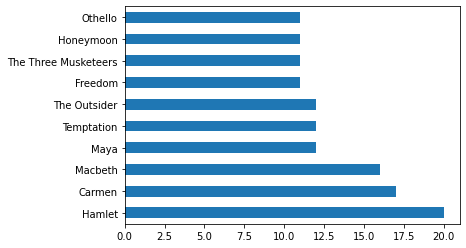

In [33]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [34]:
movies3 = movies.year.value_counts()[:3]

<AxesSubplot:>

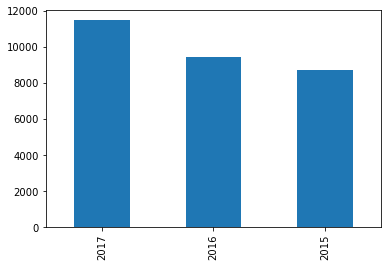

In [35]:
movies3.plot(kind='bar')

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

In [36]:
print('max year:', movies.year.max())
print('min year:', movies.year.min())
print('count year > 2022:', movies[movies.year > 2022].year.count())
print('odd...')

max year: 2115
min year: 1894
count year > 2022: 14
odd...


In [37]:
movies[movies.year == 2115]

,title,year
78061,100 Years,2115


In [38]:
# make bins
left_bins = pd.Series(range(
                    ((movies.year.min()//10)*10),
                    (((movies.year.max()+10)//10)*10),
                    10))
right_bins = left_bins.map(lambda x: x+9)

bin_intervals = pd.IntervalIndex.from_arrays(left_bins, right_bins, closed='both')
bin_intervals

IntervalIndex([[1890, 1899], [1900, 1909], [1910, 1919], [1920, 1929], [1930, 1939] ... [2070, 2079], [2080, 2089], [2090, 2099], [2100, 2109], [2110, 2119]], dtype='interval[int64, both]')

In [39]:
import numpy as np

movies['decade'] = movies['year'] / 10
movies.decade = movies.decade.astype(int)
movies['decade'] = movies['decade'] * 10

movies.groupby('decade').count()

,title,year
decade,,
1890,3,3
1900,39,39
1910,6799,6799
1920,9034,9034
1930,10388,10388
1940,8718,8718
1950,12934,12934
1960,17976,17976
1970,19526,19526


(array([4.20000e+01, 1.58330e+04, 1.03880e+04, 2.16520e+04, 1.79760e+04,
        4.05600e+04, 2.29920e+04, 1.15185e+05, 2.85000e+02, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([1890.        , 1905.71428571, 1921.42857143, 1937.14285714,
        1952.85714286, 1968.57142857, 1984.28571429, 2000.        ,
        2015.71428571, 2031.42857143, 2047.14285714, 2062.85714286,
        2078.57142857, 2094.28571429, 2110.        ]),
 <BarContainer object of 14 artists>)

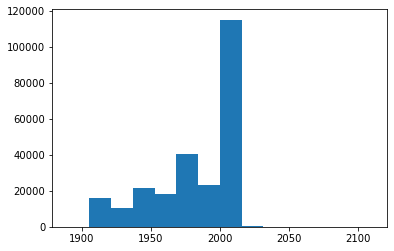

In [40]:
plt.hist(movies['decade'], bins=14)

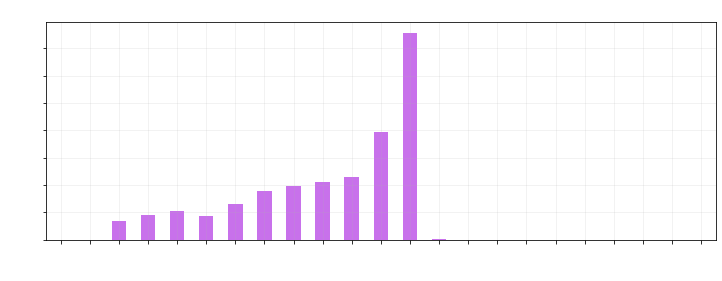

In [41]:
# ripping from Nickil Maveli on Stack Overflow:
# https://stackoverflow.com/questions/43005462/pandas-bar-plot-with-binned-range

# Plot

out = pd.cut(movies.year, bins=bin_intervals, include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(color='#c871eb', figsize=(12,4))
ax.set_xticklabels([str(i) for i in left_bins], rotation=60, color='white')
plt.yticks(color = 'white')
plt.grid(visible=True, alpha=0.2)
plt.title('Total Number of Films Released per Decade 1890-2120', color='white')
plt.show()

In [42]:
out

0         [2000, 2009]
1         [2010, 2019]
2         [2000, 2009]
3         [2010, 2019]
4         [2010, 2019]
              ...     
244909    [1990, 1999]
244910    [1980, 1989]
244911    [1970, 1979]
244912    [1950, 1959]
244913    [1990, 1999]
Name: year, Length: 244914, dtype: category
Categories (23, interval[int64, both]): [[1890, 1899] < [1900, 1909] < [1910, 1919] < [1920, 1929] ... [2080, 2089] < [2090, 2099] < [2100, 2109] < [2110, 2119]]

In [43]:
# pd.cut() was a fun method... and useful!!

out

0         [2000, 2009]
1         [2010, 2019]
2         [2000, 2009]
3         [2010, 2019]
4         [2010, 2019]
              ...     
244909    [1990, 1999]
244910    [1980, 1989]
244911    [1970, 1979]
244912    [1950, 1959]
244913    [1990, 1999]
Name: year, Length: 244914, dtype: category
Categories (23, interval[int64, both]): [[1890, 1899] < [1900, 1909] < [1910, 1919] < [1920, 1929] ... [2080, 2089] < [2090, 2099] < [2100, 2109] < [2110, 2119]]

In [44]:
# verify the 2010-2020... seems fishy
movies[(movies.year >= 2010) & (movies.year < 2020)].year.count()

75733

In [45]:
# verify the 2020-2030 bin
movies[(movies.year >= 2020) & (movies.year <= 2030)].year.count()

285

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [46]:
# A. 10 most common character names
cast.character.value_counts().head(10)

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64

In [47]:
# B. top 10 credited as "Herself"
cast[cast.character.str.contains('Herself', case=False)].name.value_counts().head(10)

Queen Elizabeth II                  18
Jacqueline Kennedy                  12
Margaret Thatcher                   10
Joyce Brothers                      10
Hillary Clinton                      9
Mar?a Luisa (V) Mart?n               9
Luisa Horga                          9
Pat Nixon                            8
Caroline Kennedy                     7
Queen Elizabeth the Queen Mother     7
Name: name, dtype: int64

In [48]:
# C. top 10 credited as "Himself"
cast[cast.character.str.contains('Himself', case=False)].name.value_counts().head(10)

Adolf Hitler             115
Richard Nixon             54
John F. Kennedy           49
Ronald Reagan             46
George W. Bush            28
Winston Churchill         28
Martin Luther King        26
Benito Mussolini          26
Franklin D. Roosevelt     25
Bill Clinton              23
Name: name, dtype: int64

That's pretty weird... third reich movies/propoganda? let's find out.

In [49]:
# What is Hitler up to in all these movies

ah_df = cast[cast.name == 'Adolf Hitler']
pd.set_option('display.max_rows', 500)
ah_df.sort_values('year', ascending=False)

,title,year,name,type,character,n
1005074,Django,2017,Adolf Hitler,actor,Himself,NaN
1005055,Anthropoid,2016,Adolf Hitler,actor,Himself,NaN
1005145,The Man from U.N.C.L.E.,2015,Adolf Hitler,actor,Himself,NaN
1005166,What We Do in the Shadows,2014,Adolf Hitler,actor,Himself,NaN
1005152,The Sound of Spying,2014,Adolf Hitler,actor,Himself,NaN
1005142,The Imitation Game,2014,Adolf Hitler,actor,Himself,NaN
1005066,Dalla Corsica alla linea gotica,2013,Adolf Hitler,actor,Himself,NaN
1005130,The Book Thief,2013,Adolf Hitler,actor,Himself,NaN
1005163,Untitled (IV),2012,Adolf Hitler,actor,Himself,NaN
1005058,BloodRayne: The Third Reich,2011,Adolf Hitler,actor,Himself,NaN


### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [50]:
# A.
cast[cast.character.str.startswith('Zombie')].character.value_counts().head(10)

Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie Girl                      36
Zombie #1                        36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: character, dtype: int64

In [51]:
# B.
cast[cast.character.str.startswith('Police')].character.value_counts().head(10)

Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
Name: character, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

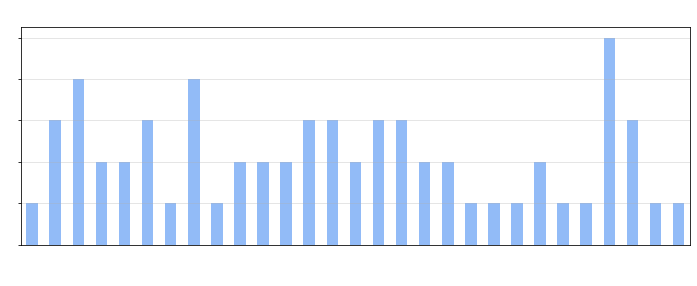

In [52]:
kr = cast[cast.name.str.contains('Keanu Reeves')].year.value_counts().sort_index()
ax = kr.plot.bar(figsize=(12,4), color='#649ef5', alpha=0.7)
ax.tick_params(axis='x', colors='white')
plt.grid(visible=True, alpha=0.4, axis='y')
plt.xticks(color='white', rotation=60)
plt.yticks(color='white')
plt.title('# of Roles played by Keanu Reeves per active year', color='white', fontsize=20)
plt.show()

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


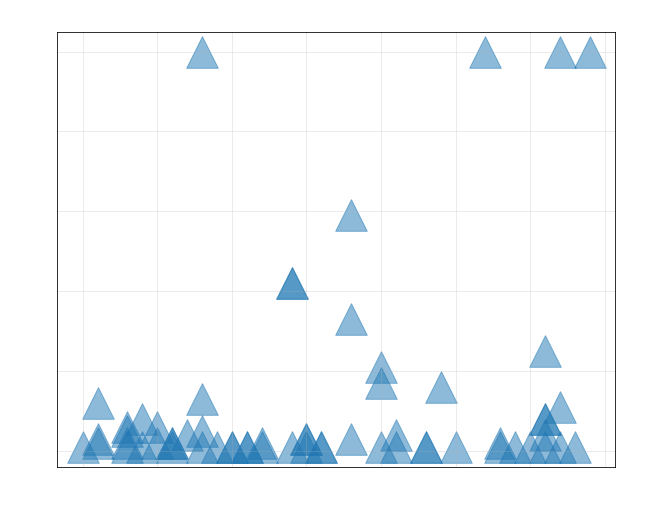

In [53]:
# Create seperate DataFrame for plotting
kr_df = cast[cast.name.str.contains('Keanu Reeves', case=False)][['year', 'n']]
kr_df['n'] = kr_df['n'].fillna(100)

# plot
ax = kr_df.plot.scatter(x='year', y='n', marker='^', s=1000, alpha=0.5, figsize=(10,8));
plt.grid(axis='both', visible=True, alpha=0.3);

ax.tick_params(axis='both', colors='white');
plt.xticks(color='white', rotation=60);
plt.yticks(color='white');
plt.xlabel('Year', color='white', fontsize=15);
plt.ylabel('n   ', color='white', fontsize=25, rotation=0);
plt.title('Keanu Reeves Roles` Importance Over the Years', color='white', fontsize=25);

In [54]:
# take log of y-axis values to make a more readable graph.

import numpy as np

kr_df['log10n'] = kr_df['n'].map(lambda x: np.log10(x))

Text(0.5, 1.0, 'Keanu Reeves Roles` Importance Over the Years')

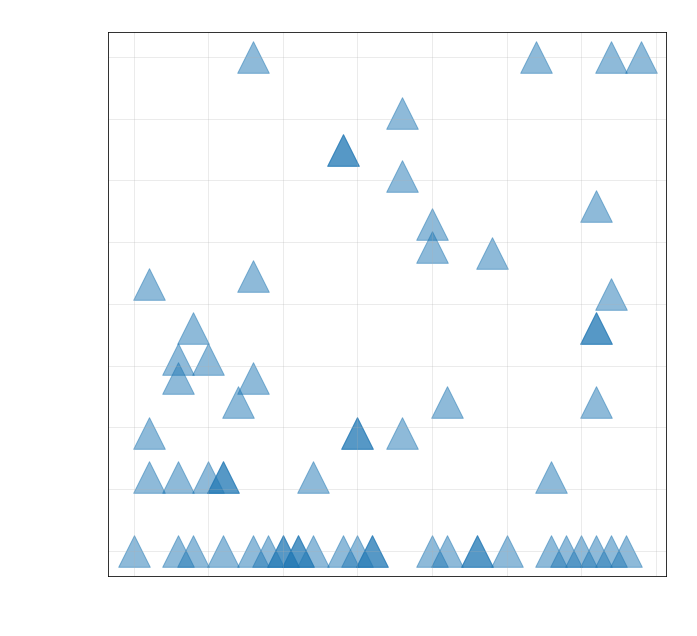

In [55]:
# Plot of log version

ax = kr_df.plot.scatter(x='year', y='log10n', marker='^', s=1000, alpha=0.5, figsize=(10,10));
plt.grid(axis='both', visible=True, alpha=0.3);

ax.tick_params(axis='both', colors='white');
plt.xticks(color='white', rotation=60);
plt.yticks(color='white');
plt.xlabel('Year', color='white', fontsize=15);
plt.ylabel('log10(n)        ', color='white', fontsize=20, rotation=0);
plt.title('Keanu Reeves Roles` Importance Over the Years', color='white', fontsize=25)

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

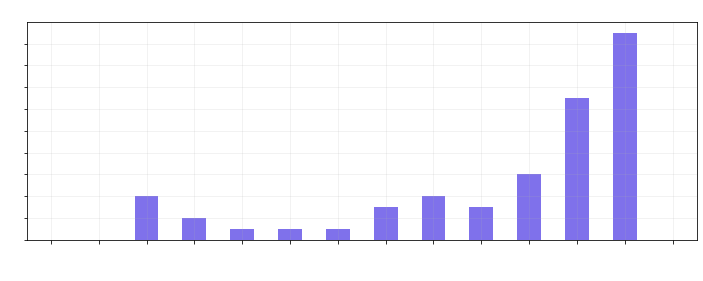

In [56]:
left_bins = pd.Series(range(1890, 2030, 10))
right_bins = pd.Series(range(1899, 2039, 10))
bin_intervals = pd.IntervalIndex.from_arrays(left_bins, right_bins, closed='both')

out = pd.cut(movies[movies.title.str.contains("Hamlet")].year, bins=bin_intervals, include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(color='#7f71eb', figsize=(12,4))
ax.set_xticklabels([str(i) for i in left_bins], rotation=60, color='white')
ax.yaxis.set_ticks(np.arange(0, 20, 2))
plt.yticks(color = 'white')
plt.grid(visible=True, alpha=0.2)
plt.title('Total Number of Hamlet Films Released per Decade 1890-2020', color='white')
plt.show()

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [57]:
# A. Total number of leading roles available to both actors and actresses 1960-1969
cast[(cast['n'] == 1.0) & (cast['year'] < 1970) & (cast['year'] >= 1960)].n.count()

11823

In [58]:
cast[(cast['n'] == 1.0) & (cast['year'] < 2010) & (cast['year'] >= 2000)].n.count()

26344

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [245]:
# Get a DataFrame for all Frank Oz Roles

df_frank = cast.loc[(cast['name'] == 'Frank Oz'), ['title', 'year']]
df_frank

,title,year
1723598,An American Werewolf in London,1981
1723599,An American Werewolf in London,1981
1723600,Blues Brothers 2000,1998
1723601,Follow That Bird,1985
1723602,Follow That Bird,1985
1723603,Follow That Bird,1985
1723604,Innocent Blood,1992
1723605,Inside Out,2015
1723606,Labyrinth,1986
1723607,"Monsters, Inc.",2001


In [233]:
# In which movies did Oz play more than one role?
df_frank.value_counts(['title', 'year'])

title                                           year
The Muppet Movie                                1979    8
The Muppets Take Manhattan                      1984    7
The Muppet Christmas Carol                      1992    7
The Great Muppet Caper                          1981    6
Muppet Treasure Island                          1996    4
Muppets from Space                              1999    4
Follow That Bird                                1985    3
The Adventures of Elmo in Grouchland            1999    3
An American Werewolf in London                  1981    2
The Dark Crystal                                1982    2
Star Wars: Episode VII - The Force Awakens      2015    1
Trading Places                                  1983    1
The Great Gilly Hopkins                         2015    1
The Blues Brothers                              1980    1
Superman III                                    1983    1
Star Wars: Episode V - The Empire Strikes Back  1980    1
Star Wars: Episode 

In [234]:
# Create a mask for the movies where Oz played more than one role
mask_series = (df_frank.value_counts('title') > 1)
mask_list = [x for x in mask_series.index if mask_series[x] == True]
mask_list

['The Muppet Movie',
 'The Muppets Take Manhattan',
 'The Muppet Christmas Carol',
 'The Great Muppet Caper',
 'Muppet Treasure Island',
 'Muppets from Space',
 'Follow That Bird',
 'The Adventures of Elmo in Grouchland',
 'An American Werewolf in London',
 'The Dark Crystal']

In [235]:
# Create a new dataframe and populate with data using the mask

df_oz_year = pd.DataFrame(columns = ['title','year'])
for title in mask_list:
    year = df_frank[df_frank['title'] == title].year
    year = year[year.index[0]]
    d = {'title':title, 'year':year}
    df_oz_year = df_oz_year.append(d, ignore_index=True)
df_oz_year

/var/folders/yr/15lhp7jj7dd7qfgzkqhwhvlr0000gn/T/ipykernel_8324/1498157653.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_oz_year = df_oz_year.append(d, ignore_index=True)
/var/folders/yr/15lhp7jj7dd7qfgzkqhwhvlr0000gn/T/ipykernel_8324/1498157653.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_oz_year = df_oz_year.append(d, ignore_index=True)
/var/folders/yr/15lhp7jj7dd7qfgzkqhwhvlr0000gn/T/ipykernel_8324/1498157653.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_oz_year = df_oz_year.append(d, ignore_index=True)
/var/folders/yr/15lhp7jj7dd7qfgzkqhwhvlr0000gn/T/ipykernel_8324/1498157653.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

,title,year
0,The Muppet Movie,1979
1,The Muppets Take Manhattan,1984
2,The Muppet Christmas Carol,1992
3,The Great Muppet Caper,1981
4,Muppet Treasure Island,1996
5,Muppets from Space,1999
6,Follow That Bird,1985
7,The Adventures of Elmo in Grouchland,1999
8,An American Werewolf in London,1981
9,The Dark Crystal,1982


In [243]:
# Sort the new dataframe by 'year' descending

df_oz_year_sorted = df_oz_year.sort_values('year', ascending=False)
df_oz_year_sorted

,title,year
5,Muppets from Space,1999
7,The Adventures of Elmo in Grouchland,1999
4,Muppet Treasure Island,1996
2,The Muppet Christmas Carol,1992
6,Follow That Bird,1985
1,The Muppets Take Manhattan,1984
9,The Dark Crystal,1982
3,The Great Muppet Caper,1981
8,An American Werewolf in London,1981
0,The Muppet Movie,1979


The following are all failed attempts. Keeping this for review and feedback, as I probably spend too much time on this one problem.

----------------------------

In [211]:
df = pd.DataFrame(columns = ['title','year'])
df

,title,year


In [210]:
d = {'title':'test', 'year': 1999}
df.append(d, ignore_index=True)

/var/folders/yr/15lhp7jj7dd7qfgzkqhwhvlr0000gn/T/ipykernel_8324/3700590779.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(d, ignore_index=True)


,title,year
0,test,1999


In [162]:
pd.concat(g for _, g in df_frank.groupby("year") if len(g) > 1)

,title,year
1723645,The Muppet Movie,1979
1723646,The Muppet Movie,1979
1723647,The Muppet Movie,1979
1723648,The Muppet Movie,1979
1723649,The Muppet Movie,1979
1723650,The Muppet Movie,1979
1723651,The Muppet Movie,1979
1723652,The Muppet Movie,1979
1723621,Star Wars: Episode V - The Empire Strikes Back,1980
1723628,The Blues Brothers,1980


In [171]:
[g for g in df_frank.groupby("year") if len(g) > 1]

[(1979,
                      title  year
  1723645  The Muppet Movie  1979
  1723646  The Muppet Movie  1979
  1723647  The Muppet Movie  1979
  1723648  The Muppet Movie  1979
  1723649  The Muppet Movie  1979
  1723650  The Muppet Movie  1979
  1723651  The Muppet Movie  1979
  1723652  The Muppet Movie  1979),
 (1980,
                                                    title  year
  1723621  Star Wars: Episode V - The Empire Strikes Back  1980
  1723628                              The Blues Brothers  1980),
 (1981,
                                    title  year
  1723598  An American Werewolf in London  1981
  1723599  An American Werewolf in London  1981
  1723632          The Great Muppet Caper  1981
  1723633          The Great Muppet Caper  1981
  1723634          The Great Muppet Caper  1981
  1723635          The Great Muppet Caper  1981
  1723636          The Great Muppet Caper  1981
  1723637          The Great Muppet Caper  1981),
 (1982,
                      title  yea

In [169]:
[title for title in df_frank.groupby('title') if df_frank.title.count() > 1]

[('An American Werewolf in London',
                                    title  year
  1723598  An American Werewolf in London  1981
  1723599  An American Werewolf in London  1981),
 ('Blues Brothers 2000',
                         title  year
  1723600  Blues Brothers 2000  1998),
 ('Follow That Bird',
                      title  year
  1723601  Follow That Bird  1985
  1723602  Follow That Bird  1985
  1723603  Follow That Bird  1985),
 ('Innocent Blood',
                    title  year
  1723604  Innocent Blood  1992),
 ('Inside Out',
                title  year
  1723605  Inside Out  2015),
 ('Labyrinth',
               title  year
  1723606  Labyrinth  1986),
 ('Monsters, Inc.',
                    title  year
  1723607  Monsters, Inc.  2001),
 ('Muppet Treasure Island',
                            title  year
  1723608  Muppet Treasure Island  1996
  1723609  Muppet Treasure Island  1996
  1723610  Muppet Treasure Island  1996
  1723611  Muppet Treasure Island  1996),
 ('Muppets

In [158]:
x = df_frank.title.value_counts() > 1
d = {'title':'test', 'year':0}
df = pd.DataFrame(data=d, index=[0])
df

,title,year
0,test,0


In [152]:
[movies.loc[(movies.title == title), ['year']].index]

[Int64Index([58702], dtype='int64')]

In [156]:
count = 0
for title in x.index:
    count += 1
    if x[title] == True:
        d = {'title':title, 'year':movies.loc[(movies.title == title)].year};
        df2 = pd.DataFrame(data=d, index=[count]);
        df = df.append(df2);
df

/var/folders/yr/15lhp7jj7dd7qfgzkqhwhvlr0000gn/T/ipykernel_8324/673052757.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2);
/var/folders/yr/15lhp7jj7dd7qfgzkqhwhvlr0000gn/T/ipykernel_8324/673052757.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2);
/var/folders/yr/15lhp7jj7dd7qfgzkqhwhvlr0000gn/T/ipykernel_8324/673052757.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2);
/var/folders/yr/15lhp7jj7dd7qfgzkqhwhvlr0000gn/T/ipykernel_8324/673052757.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2);
/var/folders/yr/15lhp7jj7dd7qfgzkqhwhvlr0000gn/T/ipykern

,title,year
0,test,0.0
1,The Muppet Movie,NaN
2,The Muppets Take Manhattan,NaN
3,The Muppet Christmas Carol,NaN
4,The Great Muppet Caper,NaN
5,Muppet Treasure Island,NaN
6,Muppets from Space,NaN
7,Follow That Bird,NaN
8,The Adventures of Elmo in Grouchland,NaN
9,An American Werewolf in London,NaN


In [105]:
df_frank = cast.loc[(cast['name'] == 'Frank Oz'), ['title', 'year']]
df_frank.loc[(df_frank.value_counts('title') > 1), ['title','year']]

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [100]:
df_frank.title.count()

64

In [59]:
frank_df = cast[cast.name == 'Frank Oz'].sort_values('year', ascending=False)
mask = (frank_df.value_counts('title') > 1)
my_list = []
for i in mask.index:
    if mask[i] == True:
        my_list.append(i)
my_list

['The Muppet Movie',
 'The Muppets Take Manhattan',
 'The Muppet Christmas Carol',
 'The Great Muppet Caper',
 'Muppet Treasure Island',
 'Muppets from Space',
 'Follow That Bird',
 'The Adventures of Elmo in Grouchland',
 'An American Werewolf in London',
 'The Dark Crystal']

In [88]:
for movie in my_list:
    title = movies[movies.title == movie]['title']
    year = movies[movies.title == movie]['year']
    print(title)
    print(year)

155750    The Muppet Movie
Name: title, dtype: object
155750    1979
Name: year, dtype: int64
46924    The Muppets Take Manhattan
Name: title, dtype: object
46924    1984
Name: year, dtype: int64
102003    The Muppet Christmas Carol
Name: title, dtype: object
102003    1992
Name: year, dtype: int64
122648    The Great Muppet Caper
Name: title, dtype: object
122648    1981
Name: year, dtype: int64
103351    Muppet Treasure Island
Name: title, dtype: object
103351    1996
Name: year, dtype: int64
183609    Muppets from Space
Name: title, dtype: object
183609    1999
Name: year, dtype: int64
163630    Follow That Bird
Name: title, dtype: object
163630    1985
Name: year, dtype: int64
97187    The Adventures of Elmo in Grouchland
Name: title, dtype: object
97187    1999
Name: year, dtype: int64
107533    An American Werewolf in London
Name: title, dtype: object
107533    1981
Name: year, dtype: int64
27762    The Dark Crystal
Name: title, dtype: object
27762    1982
Name: year, dtype: int6

In [90]:
df_oz = pd.DataFrame(columns=['title','year'])
for movie in my_list:
    title = movies[movies.title == movie]['title']
    year = movies[movies.title == movie]['year']
    df = pd.DataFrame([title, year], columns=['title','year'])
    print(df)
    df_oz = df_oz.append(df)

       title  year
title    NaN   NaN
year     NaN   NaN
       title  year
title    NaN   NaN
year     NaN   NaN
       title  year
title    NaN   NaN
year     NaN   NaN
       title  year
title    NaN   NaN
year     NaN   NaN
       title  year
title    NaN   NaN
year     NaN   NaN
       title  year
title    NaN   NaN
year     NaN   NaN
       title  year
title    NaN   NaN
year     NaN   NaN
       title  year
title    NaN   NaN
year     NaN   NaN


/var/folders/yr/15lhp7jj7dd7qfgzkqhwhvlr0000gn/T/ipykernel_8324/1173193894.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_oz = df_oz.append(df)
/var/folders/yr/15lhp7jj7dd7qfgzkqhwhvlr0000gn/T/ipykernel_8324/1173193894.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_oz = df_oz.append(df)
/var/folders/yr/15lhp7jj7dd7qfgzkqhwhvlr0000gn/T/ipykernel_8324/1173193894.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_oz = df_oz.append(df)
/var/folders/yr/15lhp7jj7dd7qfgzkqhwhvlr0000gn/T/ipykernel_8324/1173193894.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_oz = df_oz.append(df)
/var/folders/yr/15lhp7jj7dd7qfgzkqhw

       title  year
title    NaN   NaN
year     NaN   NaN
       title  year
title    NaN   NaN
year     NaN   NaN


/var/folders/yr/15lhp7jj7dd7qfgzkqhwhvlr0000gn/T/ipykernel_8324/1173193894.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_oz = df_oz.append(df)
/var/folders/yr/15lhp7jj7dd7qfgzkqhwhvlr0000gn/T/ipykernel_8324/1173193894.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_oz = df_oz.append(df)


In [85]:
x = movies[movies.title == 'The Dark Crystal']['year']
print(x)

27762    1982
Name: year, dtype: int64


In [64]:
frank_df.groupby('title').count()

,year,name,type,character,n
title,,,,,
An American Werewolf in London,2,2,2,2,2
Blues Brothers 2000,1,1,1,1,1
Follow That Bird,3,3,3,3,3
Innocent Blood,1,1,1,1,1
Inside Out,1,1,1,1,1
Labyrinth,1,1,1,1,1
"Monsters, Inc.",1,1,1,1,1
Muppet Treasure Island,4,4,4,4,4
Muppets from Space,4,4,4,4,4


In [60]:
dff = pd.DataFrame(my_list, columns=['title'])

In [61]:
type(movies.title[0])

str

In [62]:
dfff = dff.join(movies, on='title', how='inner')
dfff

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [ ]:
mask

In [ ]:
my_list = mask[mask.index == True]
my_list

In [ ]:
cast.head(50)

---------

------

----------------------

### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [256]:
# Create a mask pd.Series for characters Oz portrayed more than once, then 
# use the mask to create a list of those characters

mask_series = (cast[cast.name == 'Frank Oz'].value_counts('character') > 1)
oz_character_list = []
oz_character_list = [character for character in mask_series.index if mask_series[character] == True]
oz_character_list

['Animal',
 'Miss Piggy',
 'Yoda',
 'Cookie Monster',
 'Sam the Eagle',
 'Fozzie Bear',
 'Bert',
 'Grover']

# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

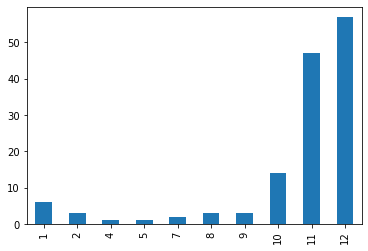

In [257]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

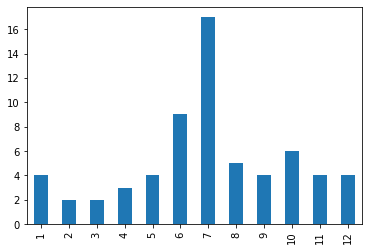

In [260]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

/var/folders/yr/15lhp7jj7dd7qfgzkqhwhvlr0000gn/T/ipykernel_8324/4277787457.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  action.date.dt.week.value_counts().sort_index().plot(kind = 'bar')


<AxesSubplot:>

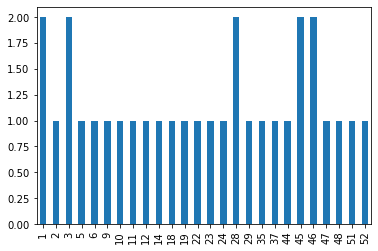

In [261]:
action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
action.date.dt.week.value_counts().sort_index().plot(kind = 'bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [264]:
# from Section 1: Q10
# dataframe of Keanu Reeves Leading Roles
df_kr_leads

,title,year,name,type,character,n
1892390,The Matrix,1999,Keanu Reeves,actor,Neo,1.0
1892397,The Replacements,2000,Keanu Reeves,actor,Shane Falco,1.0
1892358,Hard Ball,2001,Keanu Reeves,actor,Conor O'Neill,1.0
1892383,Sweet November,2001,Keanu Reeves,actor,Nelson Moss,1.0
1892348,Constantine,2005,Keanu Reeves,actor,John Constantine,1.0
1892388,The Lake House,2006,Keanu Reeves,actor,Alex Wyler,1.0
1892382,Street Kings,2008,Keanu Reeves,actor,Detective Tom Ludlow,1.0
1892385,The Day the Earth Stood Still,2008,Keanu Reeves,actor,Klaatu,1.0
1892359,Henry's Crime,2010,Keanu Reeves,actor,Henry Torne,1.0
1892342,47 Ronin,2013,Keanu Reeves,actor,Kai,1.0


In [292]:
# Create a DataFrame of only USA releases
release_dates_usa = release_dates[release_dates.country == 'USA']

In [293]:
# Join dataframes on 'title' and sort by 'date'
df2 = df_kr_leads.join(release_dates_usa.set_index('title'), on='title', lsuffix='_leads')
df2.sort_values('date', ascending=False)

,title,year_leads,name,type,character,n,year,country,date
1892366,Knock Knock,2015,Keanu Reeves,actor,Evan,1.0,2017.0,USA,2017-10-06
1892362,John Wick: Chapter 2,2017,Keanu Reeves,actor,John Wick,1.0,2017.0,USA,2017-02-10
1892366,Knock Knock,2015,Keanu Reeves,actor,Evan,1.0,2015.0,USA,2015-10-09
1892361,John Wick,2014,Keanu Reeves,actor,John Wick,1.0,2014.0,USA,2014-10-24
1892342,47 Ronin,2013,Keanu Reeves,actor,Kai,1.0,2013.0,USA,2013-12-25
1892385,The Day the Earth Stood Still,2008,Keanu Reeves,actor,Klaatu,1.0,2008.0,USA,2008-12-12
1892382,Street Kings,2008,Keanu Reeves,actor,Detective Tom Ludlow,1.0,2008.0,USA,2008-04-11
1892388,The Lake House,2006,Keanu Reeves,actor,Alex Wyler,1.0,2006.0,USA,2006-06-16
1892348,Constantine,2005,Keanu Reeves,actor,John Constantine,1.0,2005.0,USA,2005-02-18
1892358,Hard Ball,2001,Keanu Reeves,actor,Conor O'Neill,1.0,2001.0,USA,2001-09-14


Some titles (above) have 2 release dates in USA. Some are missing.

In [290]:
release_dates[(release_dates.title == 'Knock Knock') & (release_dates.country == 'USA')]

,title,year,country,date
196069,Knock Knock,2015,USA,2015-10-09
196083,Knock Knock,2017,USA,2017-10-06


In [303]:
# The data for Henry's Crime release in USA is missing
release_dates[(release_dates.title.str.contains("Henry's Crime"))]

,title,year,country,date
153881,Henry's Crime,2010,UK,2011-01-14
153882,Henry's Crime,2010,Belarus,2011-04-07
153883,Henry's Crime,2010,Kazakhstan,2011-04-07
153884,Henry's Crime,2010,Russia,2011-04-07
153885,Henry's Crime,2010,Ukraine,2011-04-07
153886,Henry's Crime,2010,Netherlands,2011-04-21
153887,Henry's Crime,2010,Turkey,2011-05-06
153888,Henry's Crime,2010,Armenia,2011-05-14
153889,Henry's Crime,2010,United Arab Emirates,2011-05-26
153890,Henry's Crime,2010,Malaysia,2011-06-09


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

In [374]:
has_kr = cast.loc[(cast.name.str.contains("Keanu Reeves")), ['title','year']]

In [375]:
has_kr

,title,year
1892342,47 Ronin,2013
1892343,A Scanner Darkly,2006
1892344,A Walk in the Clouds,1995
1892345,Bill & Ted's Bogus Journey,1991
1892346,Bill & Ted's Excellent Adventure,1989
1892347,Chain Reaction,1996
1892348,Constantine,2005
1892349,Dangerous Liaisons,1988
1892350,Dracula,1992
1892351,Ellie Parker,2005


In [329]:
has_kr_dates.title[has_kr_dates.index[0]]

'47 Ronin'

In [400]:
has_kr_dates = has_kr.join(release_dates_usa.set_index('title'), on='title', lsuffix='_l')
has_kr_dates = has_kr_dates.reset_index(drop=True)
has_kr_dates

,title,year_l,year,country,date
0,47 Ronin,2013,2013.0,USA,2013-12-25
1,A Scanner Darkly,2006,2006.0,USA,2006-07-28
2,A Walk in the Clouds,1995,1995.0,USA,1995-08-11
3,Bill & Ted's Bogus Journey,1991,1991.0,USA,1991-07-19
4,Bill & Ted's Excellent Adventure,1989,1989.0,USA,1989-02-17
5,Chain Reaction,1996,1996.0,USA,1996-08-02
6,Constantine,2005,2005.0,USA,2005-02-18
7,Dangerous Liaisons,1988,1988.0,USA,1989-02-24
8,Dracula,1992,1931.0,USA,1931-02-14
9,Dracula,1992,1958.0,USA,1958-05-08


In [401]:
# Drop rows which happen to have same title, but did not star Keanu Reeves
# utilize 'year_l' and 'date' columns to do this. If years do not match, drop.
for i in range(len(has_kr_dates)):
    if has_kr_dates.year_l[i] != has_kr_dates.date.dt.year[i]:
        has_kr_dates.drop(index=i, inplace=True)
has_kr_dates

,title,year_l,year,country,date
0,47 Ronin,2013,2013.0,USA,2013-12-25
1,A Scanner Darkly,2006,2006.0,USA,2006-07-28
2,A Walk in the Clouds,1995,1995.0,USA,1995-08-11
3,Bill & Ted's Bogus Journey,1991,1991.0,USA,1991-07-19
4,Bill & Ted's Excellent Adventure,1989,1989.0,USA,1989-02-17
5,Chain Reaction,1996,1996.0,USA,1996-08-02
6,Constantine,2005,2005.0,USA,2005-02-18
11,Dracula,1992,1992.0,USA,1992-11-13
14,Exposed (III),2016,2016.0,USA,2016-01-22
15,Feeling Minnesota,1996,1996.0,USA,1996-09-13


<AxesSubplot:>

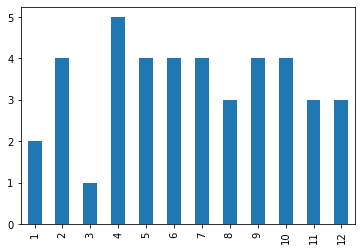

In [402]:
# Create Bar Plot
has_kr_dates.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

<AxesSubplot:>

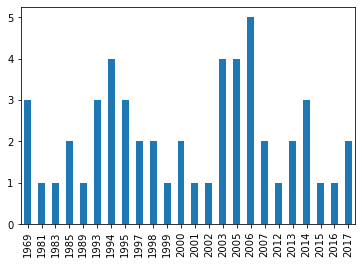

In [405]:
has_ian = cast.loc[(cast.name.str.contains("Ian McKellen")), ['title','year']]
has_ian.year.value_counts().sort_index().plot(kind='bar')